In [41]:
import numpy as np
import pandas as pd

from astropy import units as u
from astropy.time import Time

from poliastro.twobody import Orbit
from poliastro.bodies import Sun, Earth
from poliastro.ephem import Ephem
from poliastro.plotting import OrbitPlotter
from poliastro.plotting.orbit.backends import Plotly3D
from poliastro.twobody import Orbit

import matplotlib.pyplot as plt

In [42]:
# Method 1

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



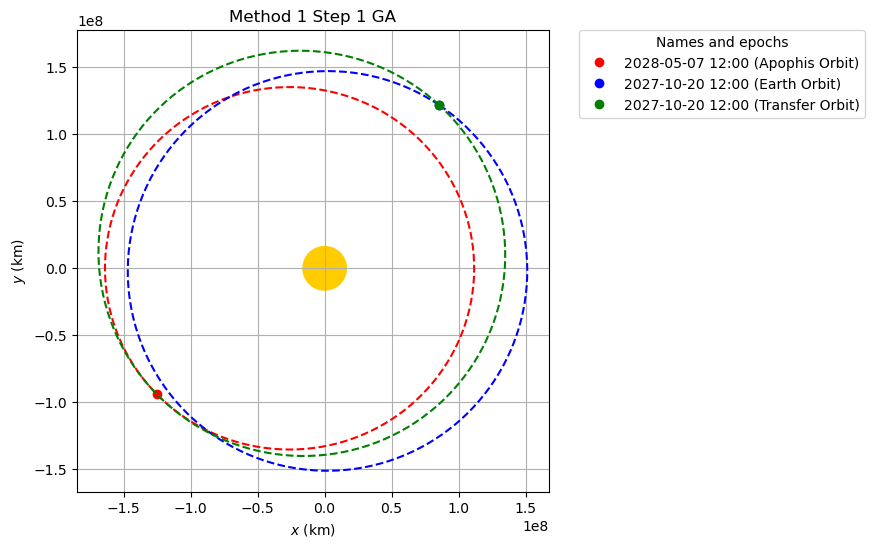

In [43]:
# Method 1 Step 1 GA
# High Assumption Plot
# Start Time
year_strt=str(2027)
month_strt=str(10)
day_strt=str(20)
time_strt=str('12:00:00')
t_start = Time(f'{year_strt}-{month_strt}-{day_strt}T{time_strt}',format='isot', scale='utc')

# Rendezvous time
year_rendez=str(2028)
month_rendez=str(5)
day_rendez=str(7)
time_rendez=str('12:00:00')
t_rendezvous = Time(f'{year_rendez}-{month_rendez}-{day_rendez}T{time_rendez}',format='isot', scale='utc')

# Define orbits
apophis_ephem_end = Ephem.from_horizons('Apophis',t_rendezvous)  
Apophis_orbit=Orbit.from_ephem(Sun, apophis_ephem_end,t_rendezvous)
earth_ephem_start = Ephem.from_horizons('399', t_start)
Earth_orbit=Orbit.from_ephem(Sun, earth_ephem_start, t_start)

# 2D plots

# Define orbital parameters
ecc = 0.133909	        * u.one  # Eccentricity
a = 1.521971e+08	    * u.km   # Semi-major axis
inc = 20.852657         * u.deg  # Inclination
argp = (301.546474)     * u.deg  # Argument of periapsis
raan = (356.355176)     * u.deg  # Right ascension of the ascending node
nu = (88.108894)        * u.deg  # True anomaly

# Transfer ornit
Transfer = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu, t_start)
# Transfer = Transfer.propagate(t_rendezvous)

# Plot
plot2D_h = OrbitPlotter()
plot2D_h.plot(Apophis_orbit, label='Apophis Orbit', color='red')
plot2D_h.plot(Earth_orbit, label='Earth Orbit', color='blue')
plot2D_h.plot(Transfer, label = 'Transfer Orbit', color='green')
plt.title('Method 1 Step 1 GA')
plt.grid()
plot2D_h.show()

In [44]:
np.linalg.norm(Apophis_orbit.r.to(u.km) - Earth_orbit.r.to(u.km))

<Quantity 3.01654921e+08 km>

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



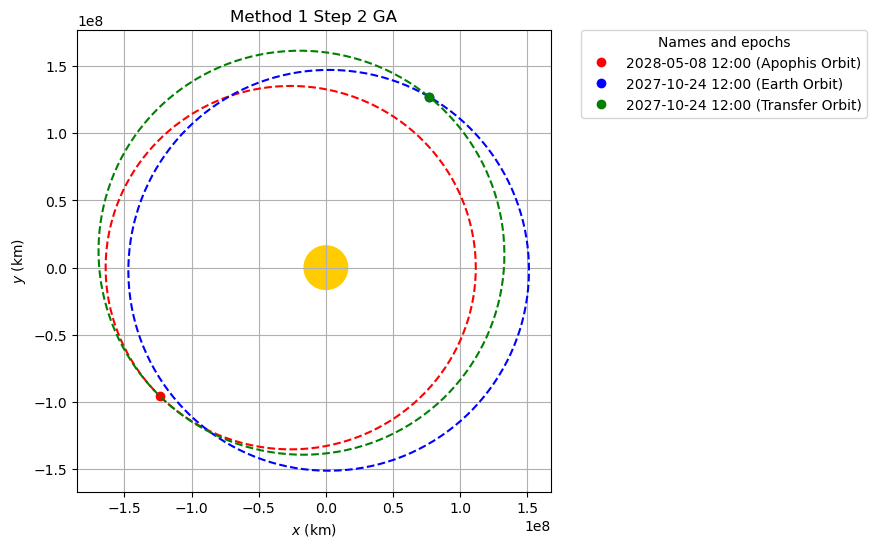

In [45]:
# Method 1 Step 2 GA
# High assumption refinement
# Start Time
year_strt=str(2027)
month_strt=str(10)
day_strt=str(24)
time_strt=str('12:00:00')
t_start = Time(f'{year_strt}-{month_strt}-{day_strt}T{time_strt}',format='isot', scale='utc')

# Rendezvous time
year_rendez=str(2028)
month_rendez=str(5)
day_rendez=str(8)
time_rendez=str('12:00:00')
t_rendezvous = Time(f'{year_rendez}-{month_rendez}-{day_rendez}T{time_rendez}',format='isot', scale='utc')

# Define orbits
apophis_ephem_end = Ephem.from_horizons('Apophis',t_rendezvous)  
Apophis_orbit=Orbit.from_ephem(Sun, apophis_ephem_end,t_rendezvous)
earth_ephem_start = Ephem.from_horizons('399', t_start)
Earth_orbit=Orbit.from_ephem(Sun, earth_ephem_start, t_start)

# Define orbital parameters
ecc = 0.140798	        * u.one  # Eccentricity
a = 1.514880e+08	    * u.km   # Semi-major axis
inc = 21.421529         * u.deg  # Inclination
raan = (356.718097)     * u.deg  # Right ascension of the ascending node
argp = (302.934566)     * u.deg  # Argument of periapsis
nu = (90.359968)        * u.deg  # True anomaly

# Transfer ornit
Transfer = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu, t_start)
# Transfer = Transfer.propagate(t_rendezvous)

# Plot
plot2D_h_refine = OrbitPlotter()
plot2D_h_refine.plot(Apophis_orbit, label='Apophis Orbit', color='red')
plot2D_h_refine.plot(Earth_orbit, label='Earth Orbit', color='blue')
plot2D_h_refine.plot(Transfer, label = 'Transfer Orbit', color='green')
plt.title('Method 1 Step 2 GA')
plt.grid()
plot2D_h_refine.show()

In [48]:
np.linalg.norm(Apophis_orbit.v.to(u.km/u.s))

<Quantity 27.11135211 km / s>

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



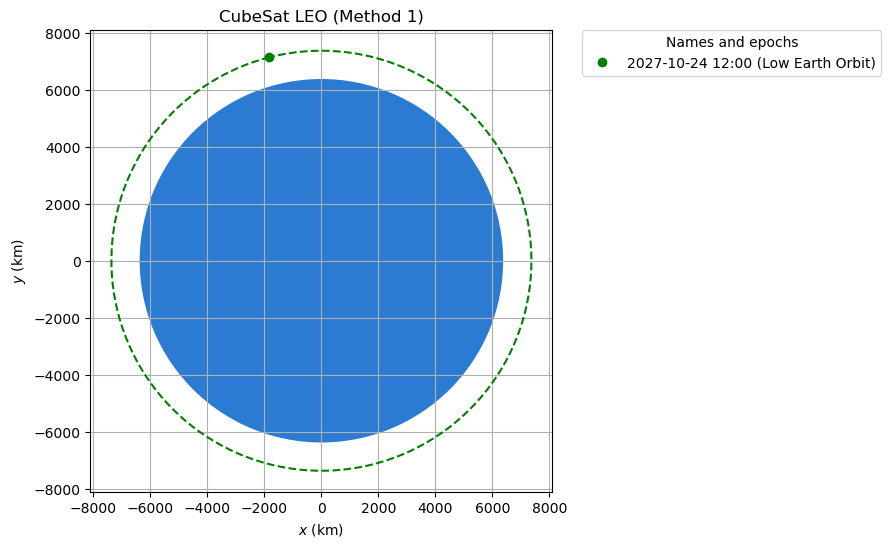

In [49]:
# Earth orbit (High assumption refinement)
# Time
year_strt=str(2027)
month_strt=str(10)
day_strt=str(24)
time_strt=str('12:00:00')
t_start = Time(f'{year_strt}-{month_strt}-{day_strt}T{time_strt}',format='isot', scale='utc')


# # Define orbits
# earth_ephem_start = Ephem.from_horizons('399', t_start)
# Earth_orbit=Orbit.from_ephem(Sun, earth_ephem_start, t_start)

# Define orbital parameters
ecc_LEO_m1 = 0     	        * u.one  # Eccentricity
a_LEO_m1 = (1000 + 6371)	* u.km   # Semi-major axis
inc_LEO_m1 = 9.702583	    * u.deg  # Inclination
raan_LEO_m1 = (198.164338)  * u.deg  # Right ascension of the ascending node
argp_LEO_m1 = (285.172016)  * u.deg  # Argument of periapsis
nu_LEO_m1 = (179.156489)    * u.deg  # True anomaly

# Transfer ornit
CubeSat = Orbit.from_classical(Earth, a_LEO_m1, ecc_LEO_m1, inc_LEO_m1, raan_LEO_m1, argp_LEO_m1, nu_LEO_m1, t_start)

# Plot
plot2D_LEO_m1 = OrbitPlotter()
plot2D_LEO_m1.plot(CubeSat, label = 'Low Earth Orbit', color='green')
plt.title('CubeSat LEO (Method 1)')
plt.grid()
plot2D_LEO_m1.show()

# Plot 3D
plot3D_LEO_m1 = OrbitPlotter(backend=Plotly3D())
plot3D_LEO_m1.plot(CubeSat, label = 'Low Earth Orbit', color='green')
plot3D_LEO_m1.show()

In [50]:
np.linalg.norm(CubeSat.v.to(u.km/u.s))

<Quantity 7.35369617 km / s>

In [34]:
# Method 2

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



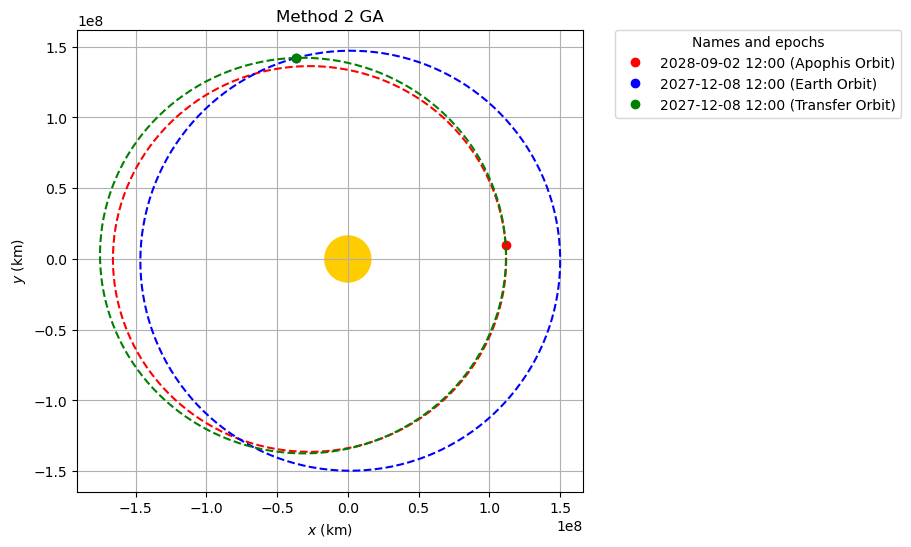

In [35]:
# Method 2 GA
# Low Assumption plot (all variables put in)
# Start Time
year_strt=str(2027)
month_strt=str(12)
day_strt=str(8)
time_strt=str('12:00:00')
t_start = Time(f'{year_strt}-{month_strt}-{day_strt}T{time_strt}',format='isot', scale='utc')

# Rendezvous time
year_rendez=str(2028)
month_rendez=str(9)
day_rendez=str(2)
time_rendez=str('12:00:00')
t_rendezvous = Time(f'{year_rendez}-{month_rendez}-{day_rendez}T{time_rendez}',format='isot', scale='utc')

# Define orbits
apophis_ephem_end = Ephem.from_horizons('Apophis',t_rendezvous)  
Apophis_orbit=Orbit.from_ephem(Sun, apophis_ephem_end,t_rendezvous)
earth_ephem_start = Ephem.from_horizons('399', t_start)
Earth_orbit=Orbit.from_ephem(Sun, earth_ephem_start, t_start)

# Define orbital parameters
ecc = 0.221405	        * u.one  # Eccentricity
a = 1.435063e+08	    * u.km   # Semi-major axis
inc = 22.939403         * u.deg  # Inclination
raan = (353.784389)     * u.deg  # Right ascension of the ascending node
argp = (332.6958)       * u.deg  # Argument of periapsis
nu = (108.698393)       * u.deg  # True anomaly

# Transfer ornit
Transfer = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu, t_start)
# Transfer = Transfer.propagate(t_rendezvous)

# Plot
plot2D_l = OrbitPlotter()
plot2D_l.plot(Apophis_orbit, label='Apophis Orbit', color='red')
plot2D_l.plot(Earth_orbit, label='Earth Orbit', color='blue')
plot2D_l.plot(Transfer, label = 'Transfer Orbit', color='green')
plt.title('Method 2 GA')
plt.grid()
plot2D_l.show()

In [36]:
np.linalg.norm(Apophis_orbit.r.to(u.km) - Transfer.r.to(u.km))

<Quantity 1.98822563e+08 km>

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/astropy/units/decorators.py:302: UserWarning:

Wrapping true anomaly to -π <= nu < π

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



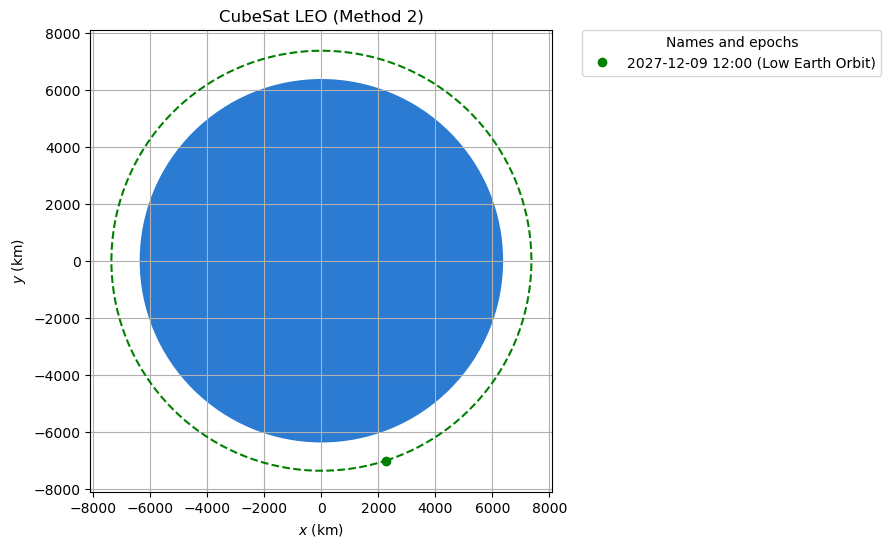

In [37]:
# Earth orbit (Low assumption plot)
# Time
year_strt=str(2027)
month_strt=str(12)
day_strt=str(9)
time_strt=str('12:00:00')
t_start = Time(f'{year_strt}-{month_strt}-{day_strt}T{time_strt}',format='isot', scale='utc')


# # Define orbits
# earth_ephem_start = Ephem.from_horizons('399', t_start)
# Earth_orbit=Orbit.from_ephem(Sun, earth_ephem_start, t_start)

# Define orbital parameters
ecc_LEO = 0     	        * u.one  # Eccentricity
a_LEO = (999.999999 + 6371)	* u.km   # Semi-major axis
inc_LEO = 141.375635         * u.deg  # Inclination
raan_LEO = (79.215844)      * u.deg  # Right ascension of the ascending node
argp_LEO = (314.0422)      * u.deg  # Argument of periapsis
nu_LEO = (333.857783)       * u.deg  # True anomaly

# Transfer ornit
CubeSat = Orbit.from_classical(Earth, a_LEO, ecc_LEO, inc_LEO, raan_LEO, argp_LEO, nu_LEO, t_start)

# Plot
plot2D_LEO = OrbitPlotter()
plot2D_LEO.plot(CubeSat, label = 'Low Earth Orbit', color='green')
plt.title('CubeSat LEO (Method 2)')
plt.grid()
plot2D_LEO.show()

# Plot 3D
plot3D_LEO = OrbitPlotter(backend=Plotly3D())
plot3D_LEO.plot(CubeSat, label = 'Low Earth Orbit', color='green')
plot3D_LEO.show()


/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



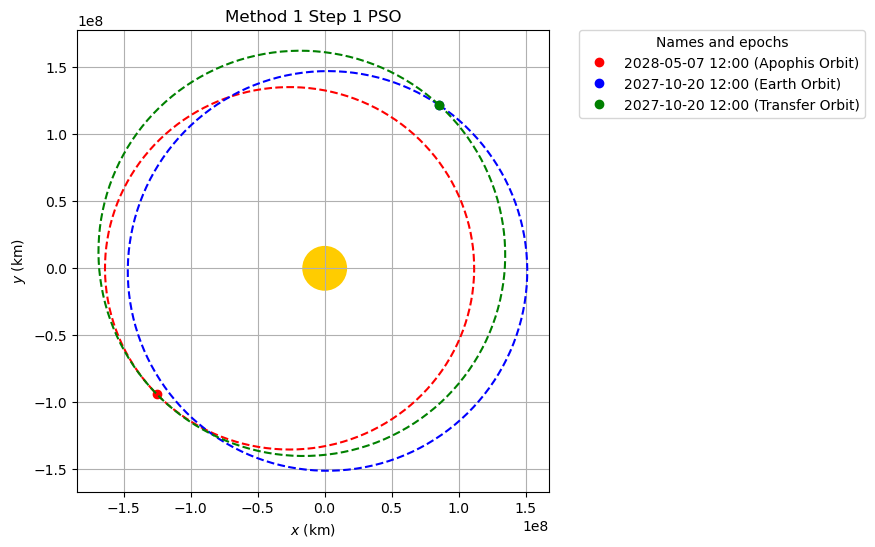

In [38]:
# Method 1 Step 1 PSO comparison
# Start Time
year_strt=str(2027)
month_strt=str(10)
day_strt=str(20)
time_strt=str('12:00:00')
t_start = Time(f'{year_strt}-{month_strt}-{day_strt}T{time_strt}',format='isot', scale='utc')

# Rendezvous time
year_rendez=str(2028)
month_rendez=str(5)
day_rendez=str(7)
time_rendez=str('12:00:00')
t_rendezvous = Time(f'{year_rendez}-{month_rendez}-{day_rendez}T{time_rendez}',format='isot', scale='utc')

# Define orbits
apophis_ephem_end = Ephem.from_horizons('Apophis',t_rendezvous)  
Apophis_orbit=Orbit.from_ephem(Sun, apophis_ephem_end,t_rendezvous)
earth_ephem_start = Ephem.from_horizons('399', t_start)
Earth_orbit=Orbit.from_ephem(Sun, earth_ephem_start, t_start)

# Define orbital parameters
ecc = 0.133909	        * u.one  # Eccentricity
a = 1.521971e+08	    * u.km   # Semi-major axis
inc = 20.852657         * u.deg  # Inclination
raan = (356.355176)     * u.deg  # Right ascension of the ascending node
argp = (301.546474)       * u.deg  # Argument of periapsis
nu = (88.108894)       * u.deg  # True anomaly

# Transfer ornit
Transfer = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu, t_start)
# Transfer = Transfer.propagate(t_rendezvous)

# Plot
plot2D_l = OrbitPlotter()
plot2D_l.plot(Apophis_orbit, label='Apophis Orbit', color='red')
plot2D_l.plot(Earth_orbit, label='Earth Orbit', color='blue')
plot2D_l.plot(Transfer, label = 'Transfer Orbit', color='green')
plt.title('Method 1 Step 1 PSO')
plt.grid()
plot2D_l.show()

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



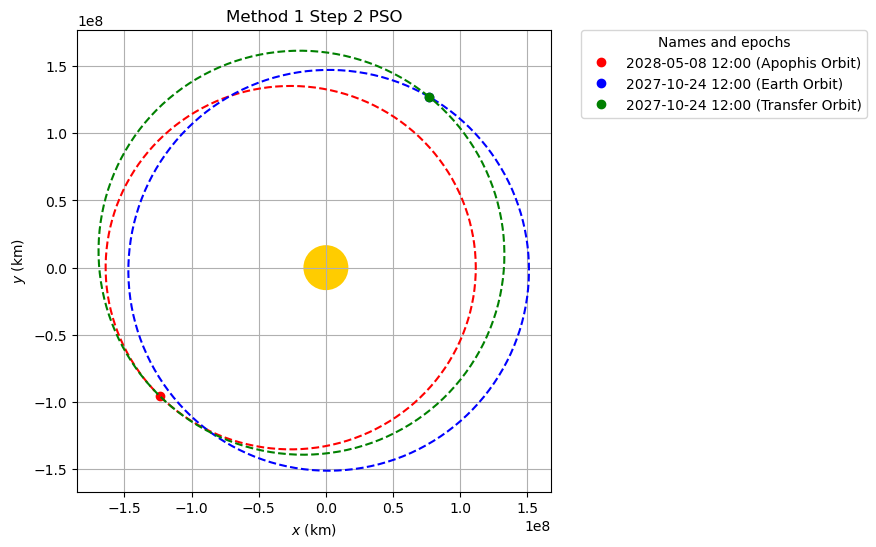

In [39]:
# Method 1 Step 2 PSO comparison
# Start Time
year_strt=str(2027)
month_strt=str(10)
day_strt=str(24)
time_strt=str('12:00:00')
t_start = Time(f'{year_strt}-{month_strt}-{day_strt}T{time_strt}',format='isot', scale='utc')

# Rendezvous time
year_rendez=str(2028)
month_rendez=str(5)
day_rendez=str(8)
time_rendez=str('12:00:00')
t_rendezvous = Time(f'{year_rendez}-{month_rendez}-{day_rendez}T{time_rendez}',format='isot', scale='utc')

# Define orbits
apophis_ephem_end = Ephem.from_horizons('Apophis',t_rendezvous)  
Apophis_orbit=Orbit.from_ephem(Sun, apophis_ephem_end,t_rendezvous)
earth_ephem_start = Ephem.from_horizons('399', t_start)
Earth_orbit=Orbit.from_ephem(Sun, earth_ephem_start, t_start)

# Define orbital parameters
ecc = 0.140798	        * u.one  # Eccentricity
a = 1.514878e+08	    * u.km   # Semi-major axis
inc = 21.420089         * u.deg  # Inclination
raan = (356.717248)     * u.deg  # Right ascension of the ascending node
argp = (302.935731)     * u.deg  # Argument of periapsis
nu = (90.359380)        * u.deg  # True anomaly

# Transfer ornit
Transfer = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu, t_start)
# Transfer = Transfer.propagate(t_rendezvous)

# Plot
plot2D_l = OrbitPlotter()
plot2D_l.plot(Apophis_orbit, label='Apophis Orbit', color='red')
plot2D_l.plot(Earth_orbit, label='Earth Orbit', color='blue')
plot2D_l.plot(Transfer, label = 'Transfer Orbit', color='green')
plt.title('Method 1 Step 2 PSO')
plt.grid()
plot2D_l.show()

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



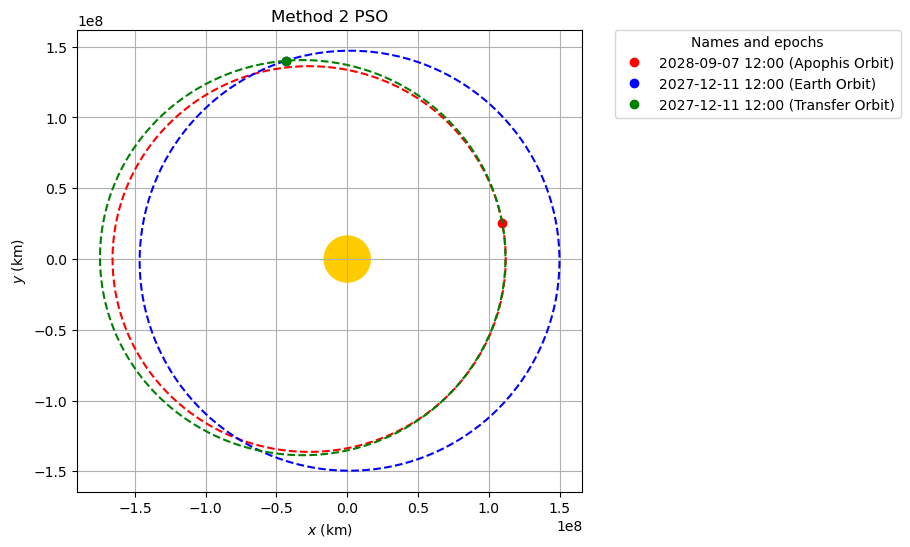

In [40]:
# Method 2 PSO comparison
# Start Time
year_strt=str(2027)
month_strt=str(12)
day_strt=str(11)
time_strt=str('12:00:00')
t_start = Time(f'{year_strt}-{month_strt}-{day_strt}T{time_strt}',format='isot', scale='utc')

# Rendezvous time
year_rendez=str(2028)
month_rendez=str(9)
day_rendez=str(7)
time_rendez=str('12:00:00')
t_rendezvous = Time(f'{year_rendez}-{month_rendez}-{day_rendez}T{time_rendez}',format='isot', scale='utc')

# Define orbits
apophis_ephem_end = Ephem.from_horizons('Apophis',t_rendezvous)  
Apophis_orbit=Orbit.from_ephem(Sun, apophis_ephem_end,t_rendezvous)
earth_ephem_start = Ephem.from_horizons('399', t_start)
Earth_orbit=Orbit.from_ephem(Sun, earth_ephem_start, t_start)

# Define orbital parameters
ecc = 0.219817	        * u.one  # Eccentricity
a = 1.432163e+08	    * u.km   # Semi-major axis
inc = 23.115293         * u.deg  # Inclination
raan = (354.697672)     * u.deg  # Right ascension of the ascending node
argp = (334.552809)     * u.deg  # Argument of periapsis
nu = (109.051740)       * u.deg  # True anomaly

# Transfer ornit
Transfer = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu, t_start)
# Transfer = Transfer.propagate(t_rendezvous)

# Plot
plot2D_l = OrbitPlotter()
plot2D_l.plot(Apophis_orbit, label='Apophis Orbit', color='red')
plot2D_l.plot(Earth_orbit, label='Earth Orbit', color='blue')
plot2D_l.plot(Transfer, label = 'Transfer Orbit', color='green')
plt.title('Method 2 PSO')
plt.grid()
plot2D_l.show()